In [1]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import os
import sys
import json

In [2]:
from Reafect import Reafect

In [3]:
ReafectObj = Reafect(path_to_store_maps = 'Maps/',
              path_to_abc_E= 'Abc_E/',
              path_to_store_results = 'Results_Bongaerts/',
              path_to_databases ='Databases/')

## Get all pathays and modules from KEGG

In [4]:
# List of 2021 jan 7 IDs for human metabolic modules 
hsa_modules = [   'M00001', 'M00002', 'M00003', 'M00004', 'M00005', 'M00006', 'M00007', 
                  'M00008', 'M00009', 'M00010', 'M00011', 'M00012', 'M00013', 'M00014',
                  'M00015', 'M00017', 'M00019', 'M00020', 'M00027', 'M00028', 'M00029',
                  'M00032', 'M00034', 'M00035', 'M00036', 'M00037', 'M00038', 'M00042',
                  'M00043', 'M00044', 'M00045', 'M00046', 'M00047', 'M00048', 'M00049',
                  'M00050', 'M00051', 'M00052', 'M00053', 'M00055', 'M00056', 'M00057',
                  'M00058', 'M00059', 'M00065', 'M00066', 'M00067', 'M00068', 'M00069',
                  'M00070', 'M00071', 'M00072', 'M00073', 'M00074', 'M00075', 'M00076',
                  'M00077', 'M00078', 'M00079', 'M00082', 'M00083', 'M00085', 'M00086',
                  'M00087', 'M00088', 'M00089', 'M00090', 'M00091', 'M00092', 'M00093',
                  'M00094', 'M00095', 'M00096', 'M00098', 'M00099', 'M00100', 'M00101',
                  'M00102', 'M00103', 'M00104', 'M00106', 'M00107', 'M00108', 'M00109',
                  'M00110', 'M00113', 'M00114', 'M00115', 'M00118', 'M00119', 'M00120',
                  'M00121', 'M00122', 'M00124', 'M00126', 'M00128', 'M00129', 'M00130',
                  'M00131', 'M00132', 'M00133', 'M00134', 'M00135', 'M00140', 'M00141',
                  'M00142', 'M00143', 'M00146', 'M00147', 'M00148', 'M00151', 'M00152',
                  'M00154', 'M00158', 'M00160', 'M00165', 'M00166', 'M00167', 'M00168',
                  'M00169', 'M00170', 'M00171', 'M00172', 'M00173', 'M00176', 'M00307',
                  'M00308', 'M00338', 'M00344', 'M00345', 'M00346', 'M00357', 'M00368',
                  'M00373', 'M00374', 'M00375', 'M00376', 'M00415', 'M00532', 'M00546',
                  'M00549', 'M00552', 'M00554', 'M00555', 'M00565', 'M00570', 'M00572',
                  'M00580', 'M00609', 'M00632', 'M00740', 'M00741', 'M00793', 'M00840',
                  'M00841', 'M00842', 'M00843', 'M00844', 'M00845', 'M00846', 'M00849',
                  'M00854', 'M00855', 'M00861', 'M00862', 'M00868', 'M00872', 'M00873',
                  'M00874', 'M00880', 'M00881', 'M00882', 'M00883', 'M00884', 'M00892',
                  'M00897', 'M00898', 'M00911', 'M00912', 'M00913', 'M00917', 'M00926',
                  'M00936', 'M00938']

# ReafectObj.get_modules_kegg(hsa_modules)

In [6]:
# List of 2021 jan 7 IDs for human metabolic pathways
hsa_maps = ['00010', '00020', '00030', '00040', '00051', '00052', '00053', '00061',
            '00062', '00071', '00100', '00120', '00130', '00140', '00190', '00220',
            '00230', '00232', '00240', '00250', '00260', '00270', '00280', '00290',
            '00310', '00330', '00340', '00350', '00360', '00380', '00400', '00410',
            '00430', '00440', '00450', '00470', '00480', '00500', '00510', '00511',
            '00512', '00513', '00514', '00515', '00520', '00524', '00531', '00532',
            '00533', '00534', '00561', '00562', '00563', '00564', '00565', '00590',
            '00591', '00592', '00600', '00601', '00603', '00604', '00620', '00630',
            '00640', '00650', '00670', '00730', '00740', '00750', '00760', '00770',
            '00780', '00785', '00790', '00830', '00860', '00900', '00910', '00920',
            '00980', '00983', '01040', '01100', '01200', '01210', '01212', '01230',
            '01240', '01250']


# ReafectObj.get_pathways_kegg(hsa_maps)


## Update modules and pathways with custom reactions

In [4]:
## Here you can manually add reactions with metabolites. 
# Note, that at least one metabolite in the reaction need to have a KEGG ID.
# and this needs to be specified in 'custom_ID_to_KEGG' (see below)


# Left is substrate and right is product. 
# If reaction is irreversible make sure the order of the metab-reaction-metab is correct! Reaction is from left to right.
# BUT... also make sure that the left/right side products/substrates are not mixed for reversible reactions!
# We add 'RM_' to indicate that the metabolite is a custom metabolite ID 
# We add 'RR_' to indicate that the reaction is a custom reaction ID 

# Many of the following reaction come from Recon https://www.vmh.life/

extra_reactions = [
    ('irrev',   ['RM_hpyr',             'RR_HPYRR2x',                   'RM_glyc_S'             ]),    #  3-Hydroxypyruvic acid                  ->    Glyceric acid                              
    ('rev',     ['RM_CE4970',           'RR_RE2428M',                   'RM_2mbcoa'             ]),    #  2-Methylbutyrylglycine                 ->    _                               
    ('rev',     ['RM_CE4970',           'RR_RE2428M',                   'RM_gly'                ]),    #  2-Methylbutyrylglycine                 ->    Glycine                                  
    ('rev',     ['RM_3hexdcrn',         'RR_C16OHc',                    'RM_3hexdcoa'           ]),    #  C16OH | 3-Hydroxyhexadecanoylcarnitine ->    _                                                
    ('rev',     ['RM_CE2026',           'RR_RE2111M',                   'RM_3mb2coa'            ]),    #  3-Methylcrotonylglycine                ->    3-Methylcrotonyl-CoA                              
    ('rev',     ['RM_CE2026',           'RR_RE2111M',                   'RM_gly'                ]),    #  3-Methylcrotonylglycine                ->    Glycine                                  
    ('irrev',   ['RM_mn',               'RR_B_MANNASEly',               'RM_acgam'              ]),    #  glcnac-man                             ->    _                    
    ('irrev',   ['RM_mn',               'RR_B_MANNASEly',               'RM_man'                ]),    #  glcnac-man                             ->    _                      
    ('rev',     ['RM_c10crn',           'RR_C100CPT1',                  'RM_dcacoa'             ]),    #  C10 | Decanoylcarnitine                ->    _                               
    ('rev',     ['RM_glypro',           'RR_GLYPROPRO1c',               'RM_gly'                ]),    #  Glycylproline                          ->    Glycine                          
    ('rev',     ['RM_glypro',           'RR_GLYPROPRO1c',               'RM_pro_L'              ]),    #  Glycylproline                          ->    Proline                        
    ('rev',     ['RM_c6crn',            'RR_C60CPT1',                   'RM_hxcoa'              ]),    #  C6 | Hexanoylcarnitine                 ->    _                                
    ('rev',     ['RM_CE1401',           'RR_RE1933C',                   'RM_hcys_L'             ]),    #  Homocysteine thiolactone               ->    Homocysteine                               
    ('rev',     ['RM_CE4969',           'RR_RE2429M',                   'RM_gly'                ]),    #  Isobutyrylglycine                      ->    Glycine                              
    ('rev',     ['RM_CE4969',           'RR_RE2429M',                   'RM_ibcoa'              ]),    #  Isobutyrylglycine                      ->    _                            
    ('rev',     ['RM_ivcrn',            'RR_C50CPT1',                   'RM_ivcoa'              ]),    #  C5 | Isovalerylcarnitine               ->    _                                
    ('rev',     ['RM_CE4968',           'RR_RE2427M',                   'RM_gly'                ]),    #  Isovalerylglycine                      ->    Glycine                              
    ('rev',     ['RM_CE4968',           'RR_RE2427M',                   'RM_ivcoa'              ]),    #  Isovalerylglycine                      ->    _                            
    ('irrev',   ['RM_malcoa',           'RR_r0430',                     'RM_HC10859'            ]),    #  _                                      ->    C3DC | Malonylcarnitine         
    ('rev',     ['RM_CE1556',           'RR_RE2032M',                   'RM_asn_L'              ]),    #  N-Acetylasparagine                     ->    Asparagine                            
    ('rev',     ['RM_ttdcrn',           'RR_C140CPT1',                  'RM_tdcoa'              ]),    #  C14 | Tetradecanoylcarnitine           ->    _                                    
    ('rev',     ['RM_c51crn',           'RR_C51CPT1',                   'RM_2mb2coa'            ]),    #  C5:1 | Tiglylcarnitine                 ->    _                              
    ('rev',     ['RM_occoa',            'RR_C80CPT1',                   'RM_c8crn'              ]),    #  _                                      ->    C8 | Octanoylcarnitine            
    ('rev',     ['RM_btcoa',            'RR_C40CPT1',                   'RM_c4crn'              ]),    #  _                                      ->    C4 | Butyrylcarnitine            
    ('rev',     ['RM_ppcoa',            'RR_C30CPT1',                   'RM_pcrn'               ]),    #  _                                      ->    C3 | Propionylcarnitine             
    ('rev',     ['RM_3hmbcoa',          'RR_R_2M3HBUc',                 'RM_2m3hbu'             ]),    #  _                                      ->    2-Methyl-3-hydroxybutyric acid           
    ('rev',     ['RM_2mb2coa',          'RR_R_TIGGLYc',                 'RM_tiggly'             ]),    #  _                                      ->    Tiglylglycine           
    ('rev',     ['RM_C02712',           'RR_RE2640C',                   'RM_met_L'              ]),    #  N-Acetylmethionine                     ->    Methionine                            
    ('rev',     ['RM_CE1554',           'RR_RE2642C',                   'RM_ala_L'              ]),    #  N-Acetylalanine                        ->    _                        
    ('rev',     ['RM_glutcoa',          'RR_FAOXC5C5DCc',               'RM_c5dc'               ]),    #  _                                      ->    C5DC | Glutarylcarnitine             
    ('rev',     ['RM_3mgcoa',           'RR_3mgcoac61dcmgccrn',         'RM_c61dcmgccrn'        ]),    #  _                                      ->    C6:1DC | 3-Methylglutaconylcarnitine        
    ('rev',     ['RM_3mgcoa',           'RR_MGCHrm',                    'RM_hmgcoa'             ]),    #  _                                      ->    _           
    ('rev',     ['RM_hmgcoa',           'RR_hmgcoac6dcmgcrn',           'RM_c6dcmgcrn'          ]),    #  _                                      ->    C6DC | 3-Methylglutarylcarnitine        
    ('rev',     ['C05998',              'RR_C059983ivcrn',              'RM_3ivcrn'             ]),    #  _                                      ->    C5OH | 3-Hydroxyisovalerylcarnitine           
    ('rev',     ['C05998',              'RR_C059983CE2028',             'RM_CE2028'             ]),    #  _                                      ->    3-Hydroxyisovaleric acid           
    ('irrev',   ['C03794',              'RR_C03794succinyladenosine',   'RM_succinyladenosine'  ]),    #  _                                      ->    Succinyladenosine    
    ('rev',     ['RM_asp_L',            'RR_ASPCTr',                    'RM_cbasp'              ]),    #  _                                      ->    _            
    ('rev',     ['RM_cbp',              'RR_ASPCTr',                    'RM_cbasp'              ]),    #  Carbamoylphosphate                     ->    _                            
    ('rev',     ['RM_dhor_S',           'RR_DHORTS',                    'RM_cbasp'              ]),    #  Dihydroorotic acid                     ->    _                            
    ('irrev',   ['RM_dhor_S',           'RR_DHORD9',                    'RM_orot'               ]),    #  Dihydroorotic acid                     ->    Orotic acid                             
    ('irrev',   ['C00383',              'RR_C00383malcoa',              'RM_malcoa'             ]),    #  _                                      ->    _           
    ('irrev',   ['RM_malcoa',           'RR_MCDm',                      'RM_accoa'              ]),    #  _                                      ->    _            
    ('irrev',   ['RM_7dhchsterol',      'RR_HMR_2114',                  'RM_vitd3'              ]),             
    ('rev',     ['RM_chsterols',        'RR_RE1100L',                   'RM_chsterol'           ]),

]  




# Make sure that if one of your custom IDs also has a KEGG ID that you put it in this
# dictionary.
custom_ID_to_KEGG = {
    'RM_hpyr':           'C00168',
    'RM_2mbcoa':         'C01033',
    'RM_gly':            'C00037',
    'RM_3hexdcoa':       'C05258',
    'RM_3mb2coa':        'C03069',
    'RM_acgam':          'C00140',
    'RM_man':            'C00159',
    'RM_dcacoa':         'C05274',
    'RM_pro_L':          'C00148',
    'RM_hxcoa':          'C05270',
    'RM_hcys_L':         'C00155',
    'RM_ibcoa':          'C00630',
    'RM_ivcoa':          'C02939',
    'RM_malcoa':         'C00083',
    'RM_ala_L':          'C00041',
    'RM_asn_L':          'C00152',
    'RM_tdcoa':          'C02593',
    'RM_2mb2coa':        'C03345',
    'RM_ppcoa':          'C00100',
    'RM_pcrn':           'C03017',
    'RM_aacoa':          'C00332',
    'RM_3hmbcoa':        'C04405',
    'RM_C02712':         'C02712',
    'RM_met_L':          'C00073',
    'RM_occoa':          'C01944',
    'RM_btcoa':          'C00136',
    'RM_glutcoa':        'C00527',
    'RM_hmgcoa':         'C00356',
    'RM_3mgcoa':         'C03231',
    'RM_b2coa':          'C00877',
    'RM_asp_L':          'C00049',
    'RM_cbasp':          'C00438',
    'RM_cbp':            'C00169',
    'RM_dhor_S':         'C00337',
    'RM_orot':           'C00295', 
    'RM_7dhchsterol':    'C01164',
    'RM_vitd3':          'C05443',
    'RM_chsterols':      'C18043',
    'RM_chsterol' :      'C00187' ,

}


# Make sure you also relate the correct enzyme to the added reactions
# Make sure that first element is enzyme, and second is reaction ID
custom_reactions_with_enzyme = [ 
    ['3.5.1.14',    'RR_RE2642C'],                                           
    ['2.3.1.13',    'RR_RE2428M'],                      
    ['2.3.1.13',    'RR_RE2111M'],                      
    ['3.2.1.25',    'RR_B_MANNASEly'],                  
    ['3.4.13.9',    'RR_GLYPROPRO1c'],                  
    ['3.1.1.2',     'RR_RE1933C'],                       
    ['2.3.1.13',    'RR_RE2429M'],                      
    ['2.3.1.13',    'RR_RE2427M'],                      
    ['2.3.1.21',    'RR_r0430'],                        
    ['2.3.1.1',     'RR_RE2032M'],                       
    ['2.3.1.13',    'RR_R_TIGGLYc'],                    
    ['3.5.1.14',    'RR_RE2640C'],                      
    ['1.2.4.2',     'RR_FAOXC5C5DCc'],                   
    ['1.5.5.1',     'RR_FADH2ETC'],                      
    ['6.2.1.n3',    'RR_C00383malcoa'],                 
    ['4.1.1.9',     'RR_MCDm'],                          
    ['1.3.5.2',     'RR_DHORD9'],                        
    ['6.3.5.5',     'RR_DHORTS'],                        
    ['1.1.1.81',    'RR_HPYRR2x'],                      
    ['2.3.1.21',    'RR_C16OHc'],                       
    ['4.2.1.18',    'RR_MGCHrm'],                       
    ['2.1.3.2',     'RR_ASPCTr'],                        
    ['3.1.6.2',     'RR_RE1100L'],                       
    ['3.1.6.2',     'RR_RE1100L'],   
      
]

custom_reactions_with_enzyme = pd.DataFrame(custom_reactions_with_enzyme, columns = ['enzyme','R'])


# Relate extra enzymes with genes
extra_genes_with_enzyme = [ ['6.2.1.n3','ACSF3'],
                            ['5.4.99.2','MUT'],
                          ]




In [8]:
ReafectObj.update_kegg_pathways(extra_reactions, custom_ID_to_KEGG )

In [9]:
# Compute all effective Z-scores from a metabolite to a raction in each module/pathway
# using symbolic variables (sympy)
ReafectObj.prepare_pathways()

In [14]:
# Substitute all a,b,c variables for real values
ReafectObj.determine_pathways_for_abc_params(a_params= [0.85], b_params = [0.35] ,c_params = [0.75])

a=0.85, b=0.35, c=0.75


# Our dataset

### Load Z-scores

In [5]:
def to_float(x):
    try:
        return float(x)
    except:
        return x

# This Z-score transformation could be used to downscale extreme Z-scores
def Z_score_truncation(z):
    def alpha(z):
        return (1 / ( 1 + np.exp( (2-z))))
    return np.sign(z) * ( abs(z)**0.75 * alpha(abs(z)) + (1- alpha(abs(z)))* abs(z)  ) 


Z_score_data = pd.read_csv('Databases/Z_scores_IEM_patients_Bongaerts.csv')
Z_score_data = Z_score_data.applymap(to_float)

In [6]:
Z_scores_per_patient = {}
patient_with_def_enz = {}
patient_with_def_gene = {}
for ID, col in Z_score_data.set_index('network_ID').drop(columns = ['ion_mode','metabolite']).items():
    patient_with_def_enz[ID] = col['deficient_enzyme'] 
    patient_with_def_gene[ID] = col['deficient_gene']
    df = col.drop(index = ['deficient_enzyme','deficient_gene']).dropna().apply(Z_score_truncation).reset_index()
    df.columns = ['network_ID','Z_score']
    Z_scores_per_patient[ID] = df
    

### Determine all 'deficient reaction scores' per IEM patient

In [8]:
for selected_patient in Z_scores_per_patient:
    print(selected_patient)

    SR_scores = ReafectObj.process_patient(patient_ID = selected_patient, 
                                    disease_enzyme = patient_with_def_enz[selected_patient], 
                                    Z_score_data = Z_scores_per_patient[selected_patient], 
                                    type_of_input_Z_scores = "Z_scores",   # Optional to indicate the type of Z-score input
                                    a_param= 0.85, b_param = 0.35, c_param = 0.75, 
                                    custom_reactions_with_enzyme = custom_reactions_with_enzyme)

    SR_scores = SR_scores.drop(columns = SR_scores.columns.intersection(['Unnamed: 0']) )

### Overview of ranks

In [9]:
df_ranks= pd.DataFrame([])
for selected_patient in Z_scores_per_patient:
    SR_scores = pd.read_csv('{}/{}/SR_scores_0.85_0.35_0.75_Z_scores.csv'.format(ReafectObj.path_to_store_results,selected_patient)).drop(columns = ['Unnamed: 0'])
    SR_scores_sel = SR_scores.loc[SR_scores['enzyme'] == patient_with_def_enz[selected_patient]]
    SR_scores_sel = SR_scores_sel.sort_values(by='SR',ascending=False).iloc[[0]]
    df_ranks = pd.concat([df_ranks, SR_scores_sel])
    

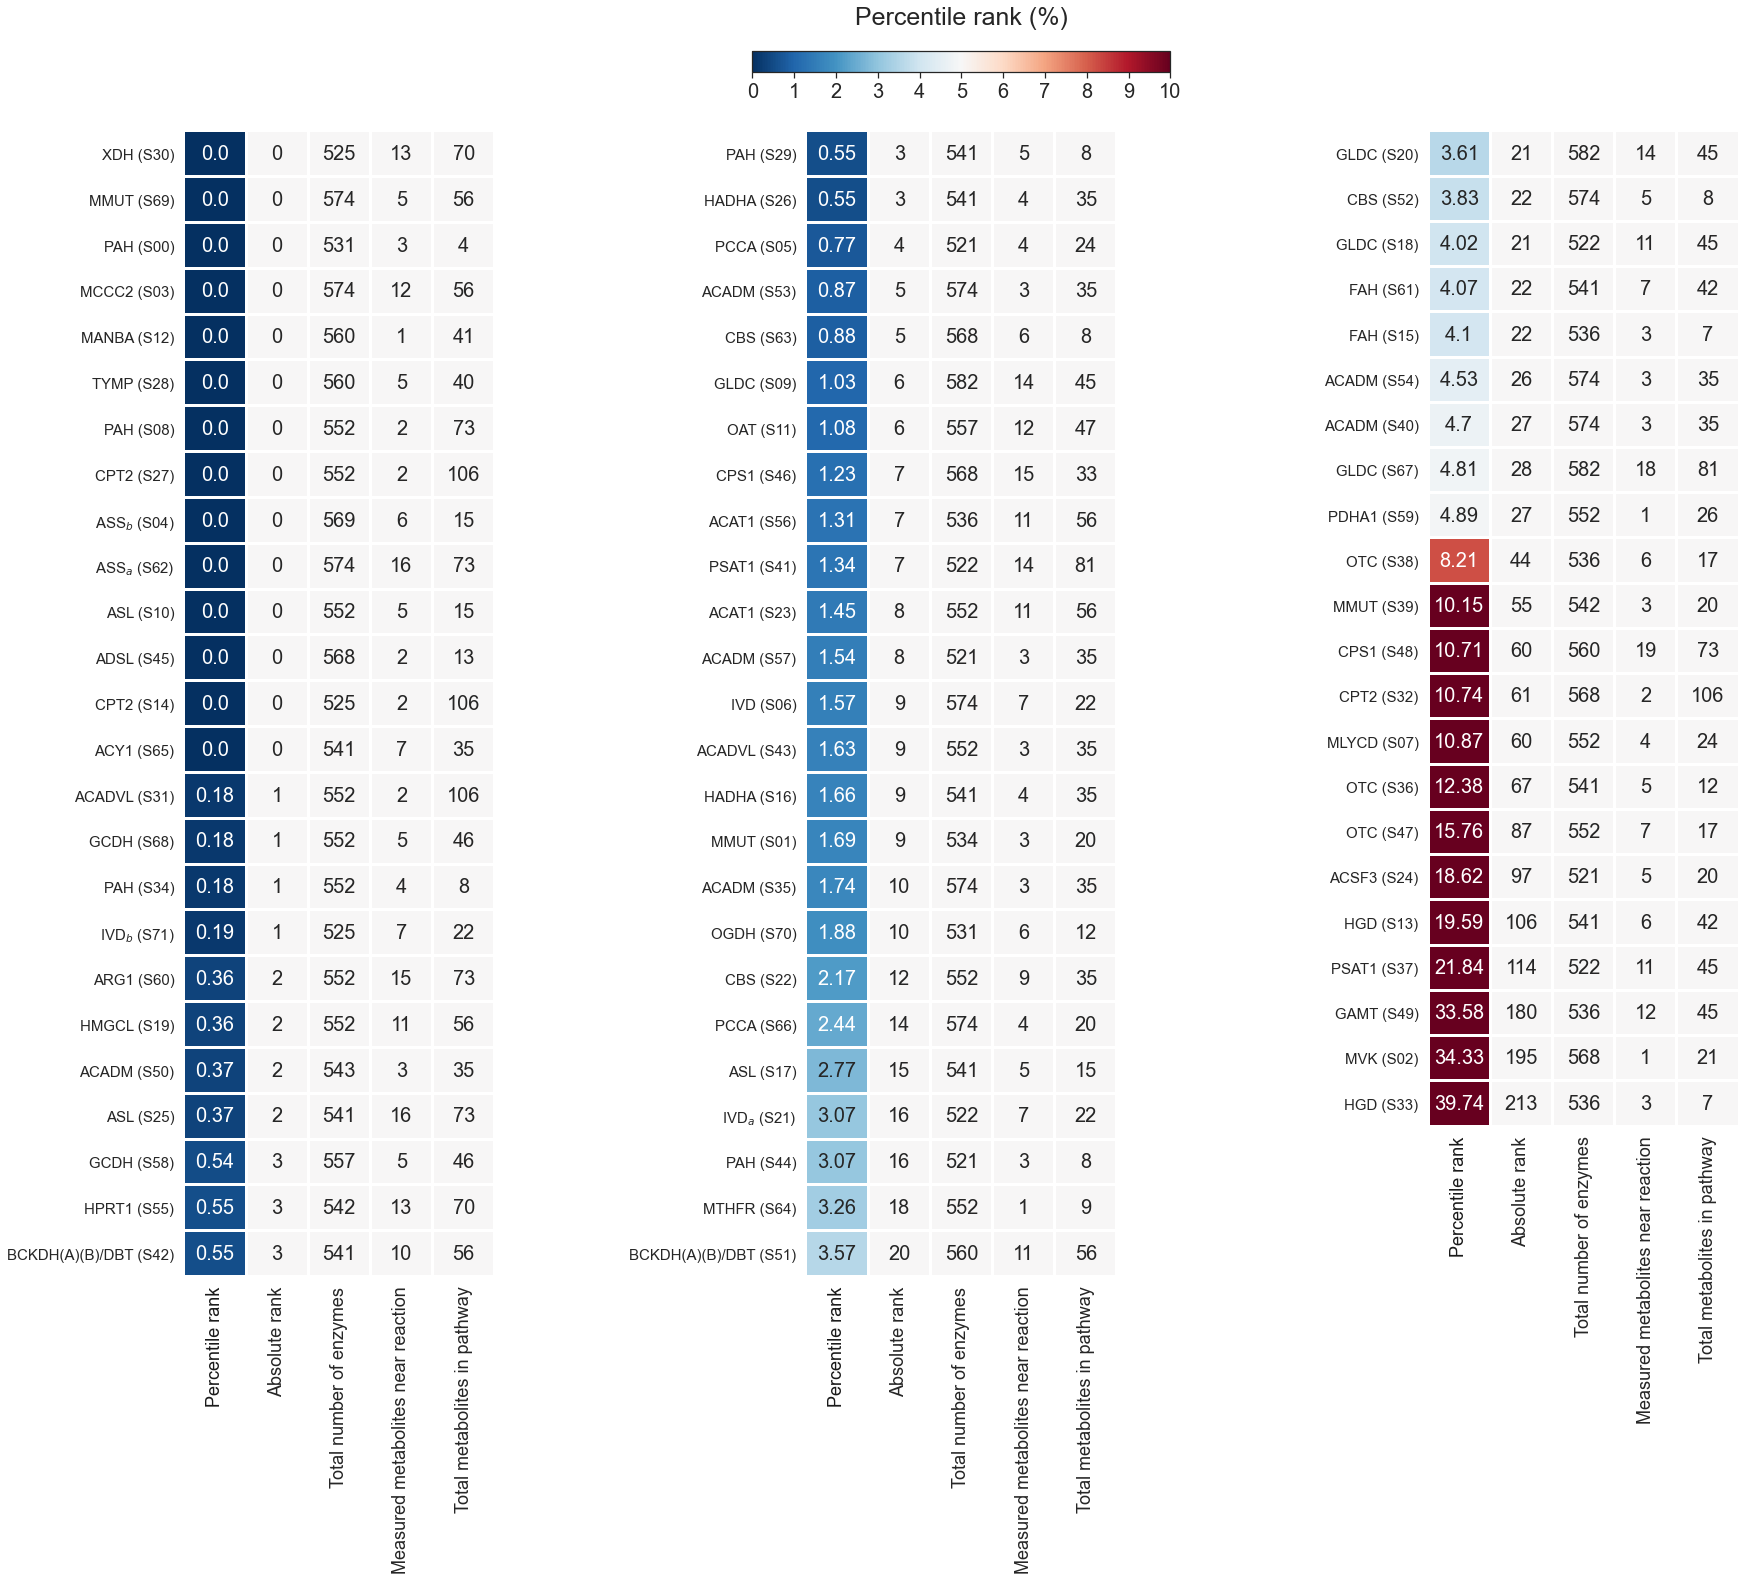

In [11]:
from Reafect.plot_functions import plot_IEM_ranking_tab
plot_IEM_ranking_tab(df_ranks, ReafectObj.path_to_store_maps, patient_with_def_gene )

Because of subtle differences in the effective Z-scores, which are determined from many different reaction paths (metabolite to reaction), the obtained ranks could slightly differ from the ranks reported in the article

### IEM ranking performance curve

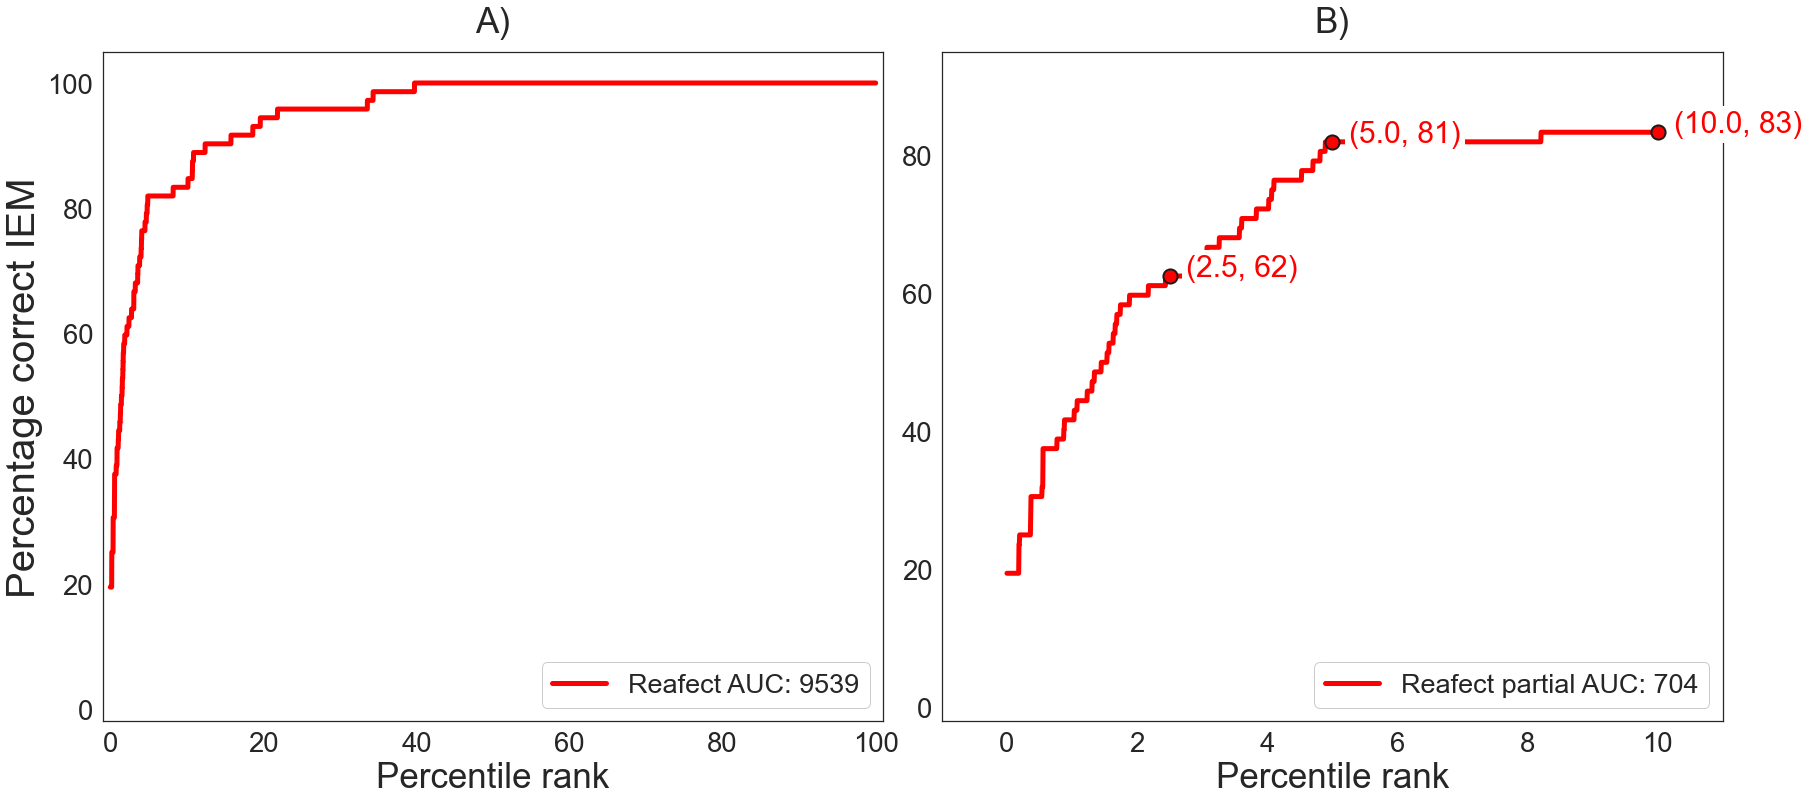

In [12]:
from Reafect.plot_functions import plot_IEM_ranking_curve
plot_IEM_ranking_curve(df_ranks)

# Miller

In [13]:
ReafectObj = Reafect(path_to_store_maps = 'Maps/',
              path_to_abc_E = 'Abc_E/',
              path_to_store_results = 'Results_Miller/', # <--- Note we change this location
              path_to_databases ='Databases/')

### Load Z-scores data Miller

In [14]:
def to_float(x):
    try:
        return float(x)
    except:
        return x

Z_score_data = pd.read_csv('Databases/Z_scores_IEM_patients_Miller.csv')
Z_score_data = Z_score_data.applymap(to_float)

In [15]:
Z_scores_per_patient = {}
patient_with_def_enz = {}
patient_with_def_gene = {}
for ID, col in Z_score_data.set_index('network_ID').drop(columns = ['metabolite']).items():
    patient_with_def_enz[ID] = col['deficient_enzyme'] 
    patient_with_def_gene[ID] = col['deficient_gene']
    df = col.drop(index = ['deficient_enzyme','deficient_gene']).dropna().reset_index()
    df.columns = ['network_ID','Z_score']
    Z_scores_per_patient[ID] = df
    

### Determine all 'deficient reaction scores' per IEM patient

In [17]:
for selected_patient in Z_scores_per_patient:
    print(selected_patient)

    SR_scores = ReafectObj.process_patient(patient_ID = selected_patient, 
                                    disease_enzyme = patient_with_def_enz[selected_patient], 
                                    Z_score_data = Z_scores_per_patient[selected_patient], 
                                    type_of_input_Z_scores = "Z_scores",   # Optional to indicate the type of Z-score input
                                    a_param= 0.85, b_param = 0.35, c_param = 0.75, 
                                    custom_reactions_with_enzyme = custom_reactions_with_enzyme)

    SR_scores = SR_scores.drop(columns = SR_scores.columns.intersection(['Unnamed: 0']) )

### Overview of ranks

In [18]:
df_ranks= pd.DataFrame([])
for selected_patient in Z_scores_per_patient:
    SR_scores = pd.read_csv('{}/{}/SR_scores_0.85_0.35_0.75_Z_scores.csv'.format(ReafectObj.path_to_store_results,selected_patient)).drop(columns = ['Unnamed: 0'])
    SR_scores_sel = SR_scores.loc[SR_scores['enzyme'] == patient_with_def_enz[selected_patient]]
    SR_scores_sel = SR_scores_sel.sort_values(by='SR',ascending=False).iloc[[0]]
    df_ranks = pd.concat([df_ranks, SR_scores_sel])

    

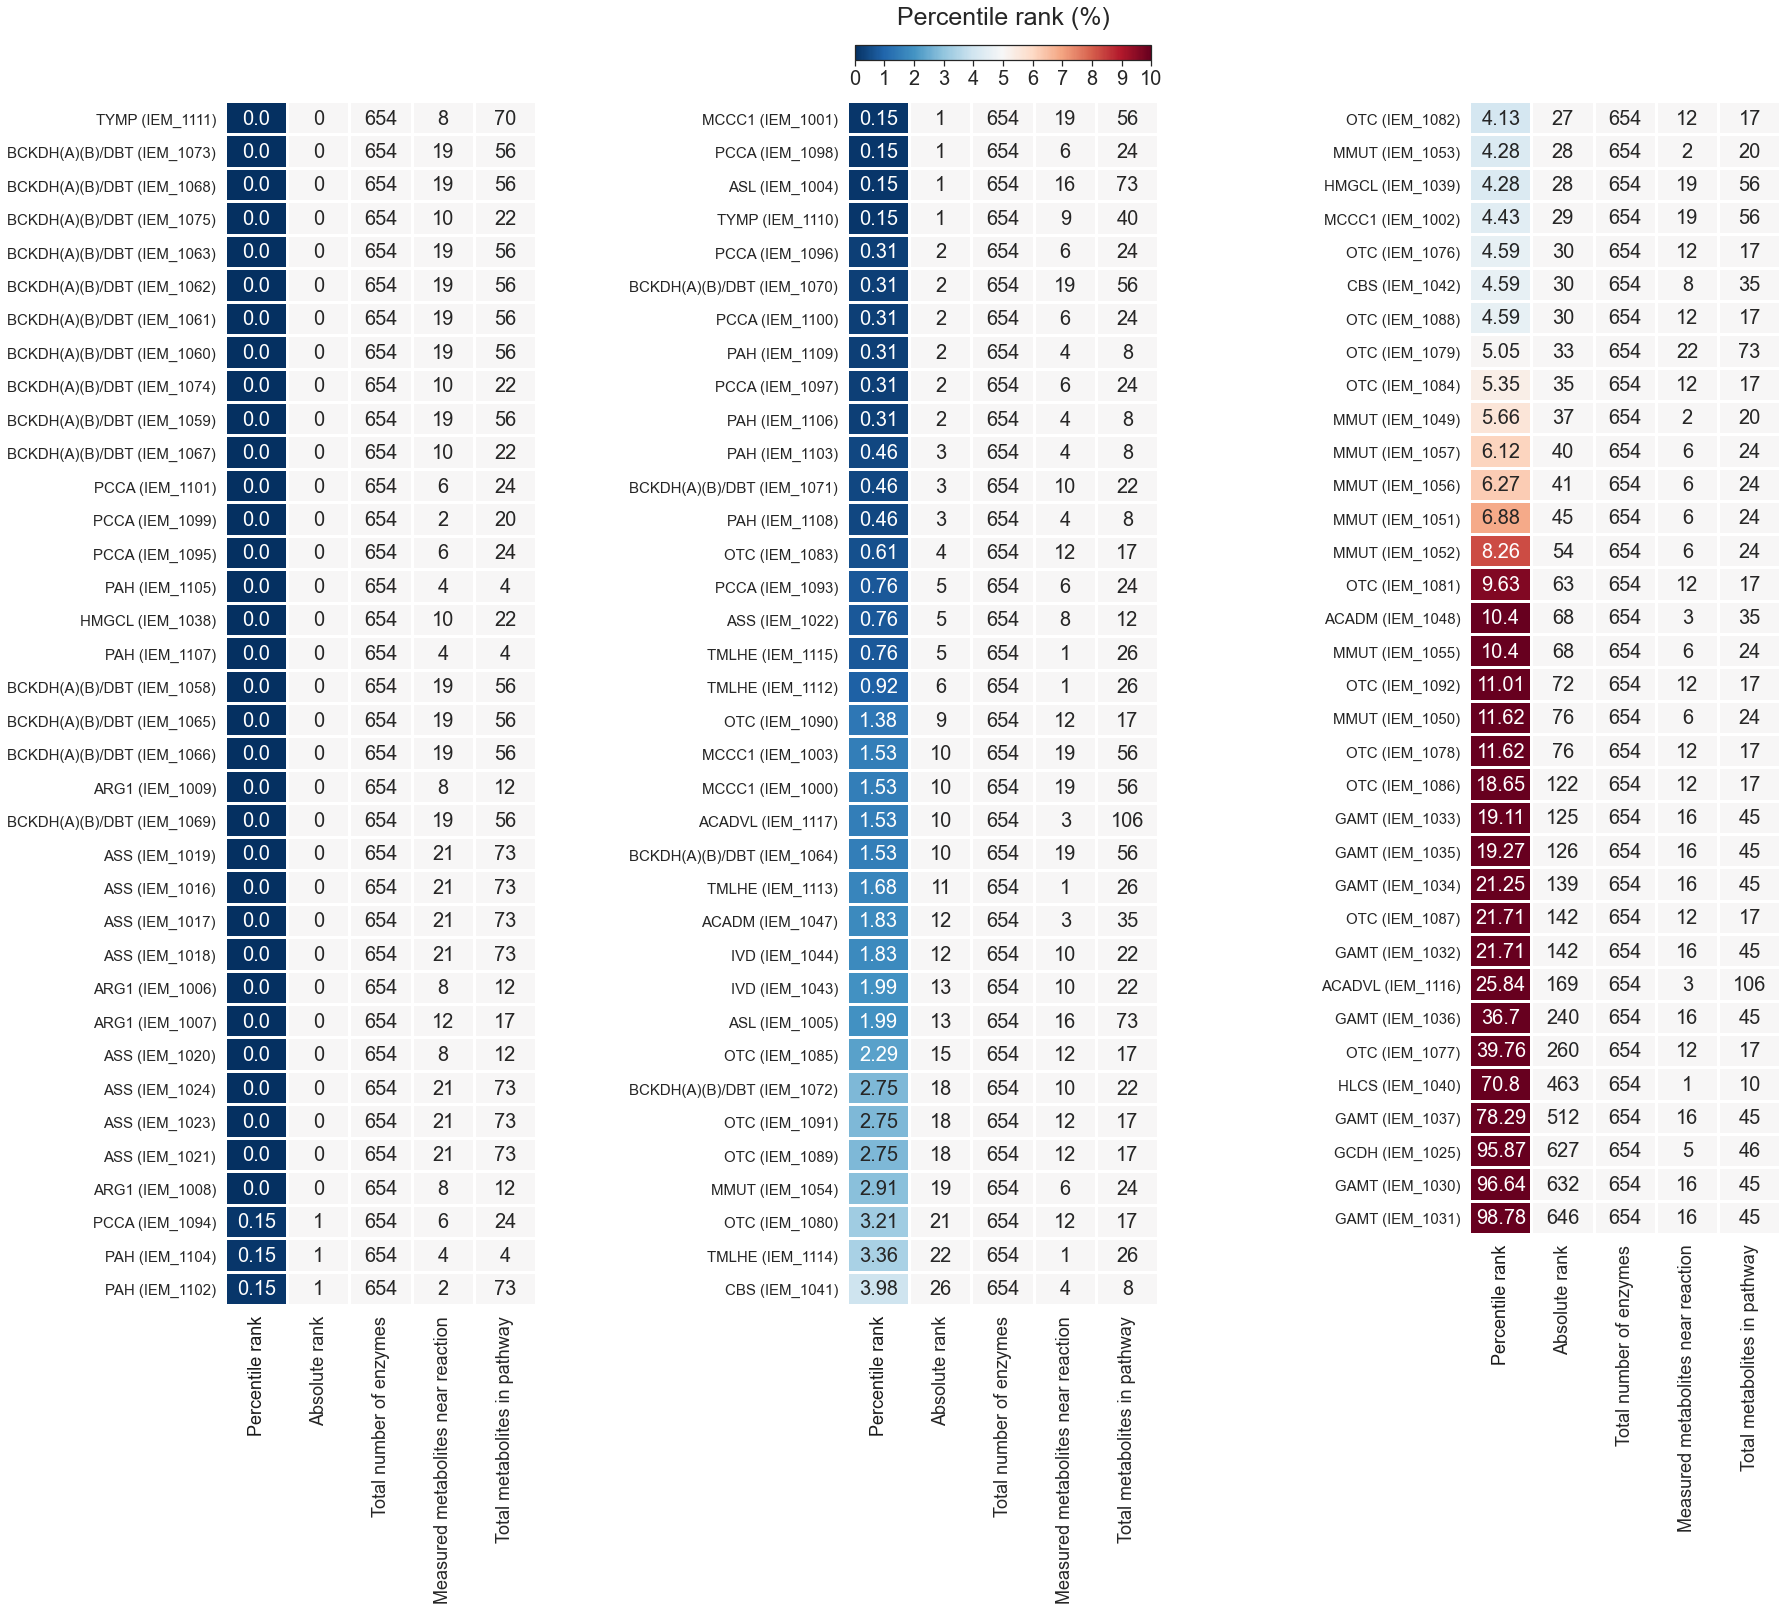

In [20]:
from Reafect.plot_functions import plot_IEM_ranking_tab
plot_IEM_ranking_tab(df_ranks, ReafectObj.path_to_store_maps, patient_with_def_gene, block_size= 36)

Because of subtle differences in the effective Z-scores, which are determined from many different reaction paths (metabolite to reaction), the obtained ranks could slightly differ from the ranks reported in the article

### IEM ranking performance curve

In [21]:
from Reafect.plot_functions import plot_IEM_ranking_curve

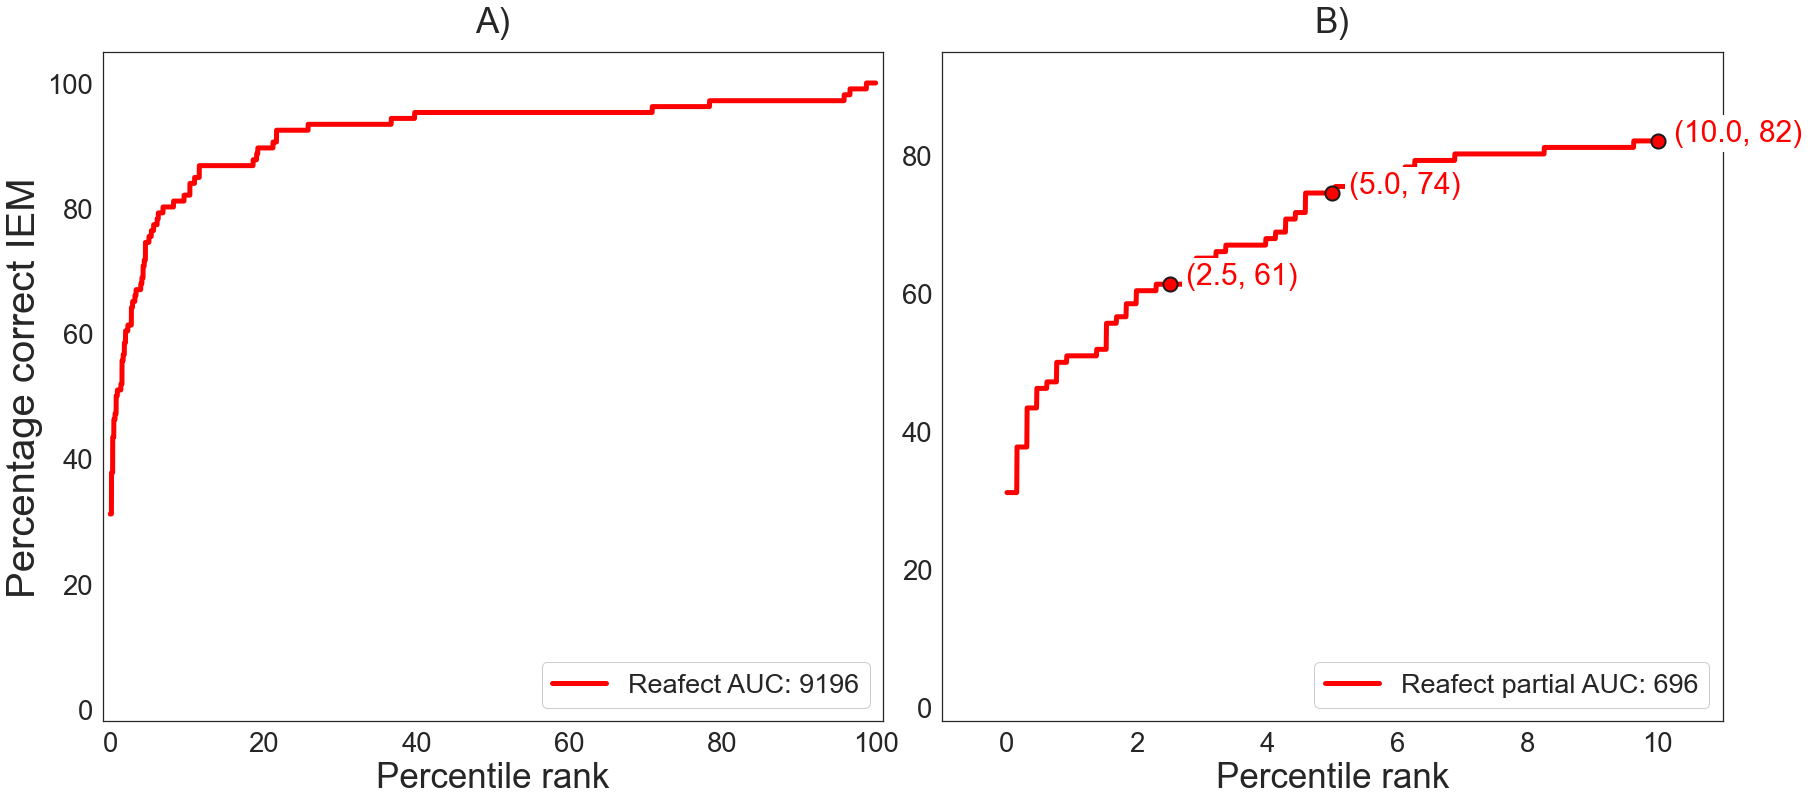

In [22]:
plot_IEM_ranking_curve(df_ranks)